In [1]:
library(spatstat)
library(sf)
options(repr.plot.width=16, repr.plot.height=8)  # opciones para los plots

Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-1

Loading required package: spatstat.random

spatstat.random 3.1-5

Loading required package: spatstat.explore

Loading required package: nlme

spatstat.explore 3.2-1

Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-4

Loading required package: spatstat.linnet

spatstat.linnet 3.1-1


spatstat 3.0-6 
For an introduction to spatstat, type ‘beginner’ 


Linking to GEOS 3.10.2, GDAL 3.6.2, PROJ 9.1.1; sf_use_s2() is TRUE



In [2]:
ma <- read.csv("muestreo_aleatorio.csv")
mr <- read.csv("muestreo_regular.csv")
cuencas <- st_read("vectores/Cuencas_BNA.shp")
cuenca <- subset(cuencas, COD_CUEN=="070")
cuenca_s <- st_simplify(cuenca, dTolerance=10) |> st_make_valid()

Reading layer `Cuencas_BNA' from data source 
  `/home/jovyan/PUC/teledeteccion_ambiental/taller_02/vectores/Cuencas_BNA.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 139 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -3701590 ymin: 3733340 xmax: 704806.4 ymax: 8065244
Projected CRS: WGS 84 / UTM zone 19S


¿Con qué datos voy a trabajar?

In [3]:
dat <- ma
head(dat)

id x        y       ndvi       evi        elevation slope     aspect    
1 0  224843.8 6138410  0.3977737  0.1769773  20.52054  7.422561  78.745583
2 1  213681.2 6137155  0.7112323  0.2994322 193.61716 17.446407 266.544067
3 2  220543.2 6142688 -0.3490885 -0.0128753   0.00000  0.000000  -1.000000
4 3  234208.7 6134705  0.4357910  0.2160663  67.13787  4.130885 275.021027
5 4  231120.3 6144118  0.4899087  0.2504660 254.94449  9.370442 130.756927
6 5  244968.1 6137034  0.3266132  0.1613672  89.05211  6.006828   9.366147
  aspect_sin  aspect_cos 
1  0.98077024  0.19516594
2 -0.99818146 -0.06028084
3 -0.01745241  0.99984770
4 -0.99616265  0.08752132
5  0.75748606 -0.65285134
6  0.16274302  0.98666849

Es importante filtrar los datos primero. Recuerde utilizar el mismo número de puntos tanto en el muestreo aleatorio como regular.

In [4]:
nrow(mr)

[1] 6818

In [5]:
nrow(ma)

[1] 10000

In [6]:
set.seed(8925146)
s <- subset(dat, ndvi > 0 & aspect != -1)[sample(nrow(mr)), ]  # Crear subconjunto de datos
# s <- mr

print(dim(dat))
print(dim(s))

[1] 10000    10
[1] 6818   10


In [7]:
cx <- s$x # crear vector con coordenadas x desde t
cy <- s$y # crear vector con coorfenadas y desde t

Obtener un resumen general de las coordenadas (valores mínimos, máximos, etc)

In [8]:
print(summary(cx))
print(summary(cy))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 208956  218201  225915  227215  235646  250757 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
6125678 6131938 6135658 6136149 6139909 6154537 


Planar point pattern:  6818 points
Average intensity 5.651786e-06 points per square meter

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 meters

Window: rectangle = [208955.91, 250757.32] x [6125678, 6154537] meters
                    (41800 x 28860 meters)
Window area = 1206340000 square meters
Unit of length: 1 meter

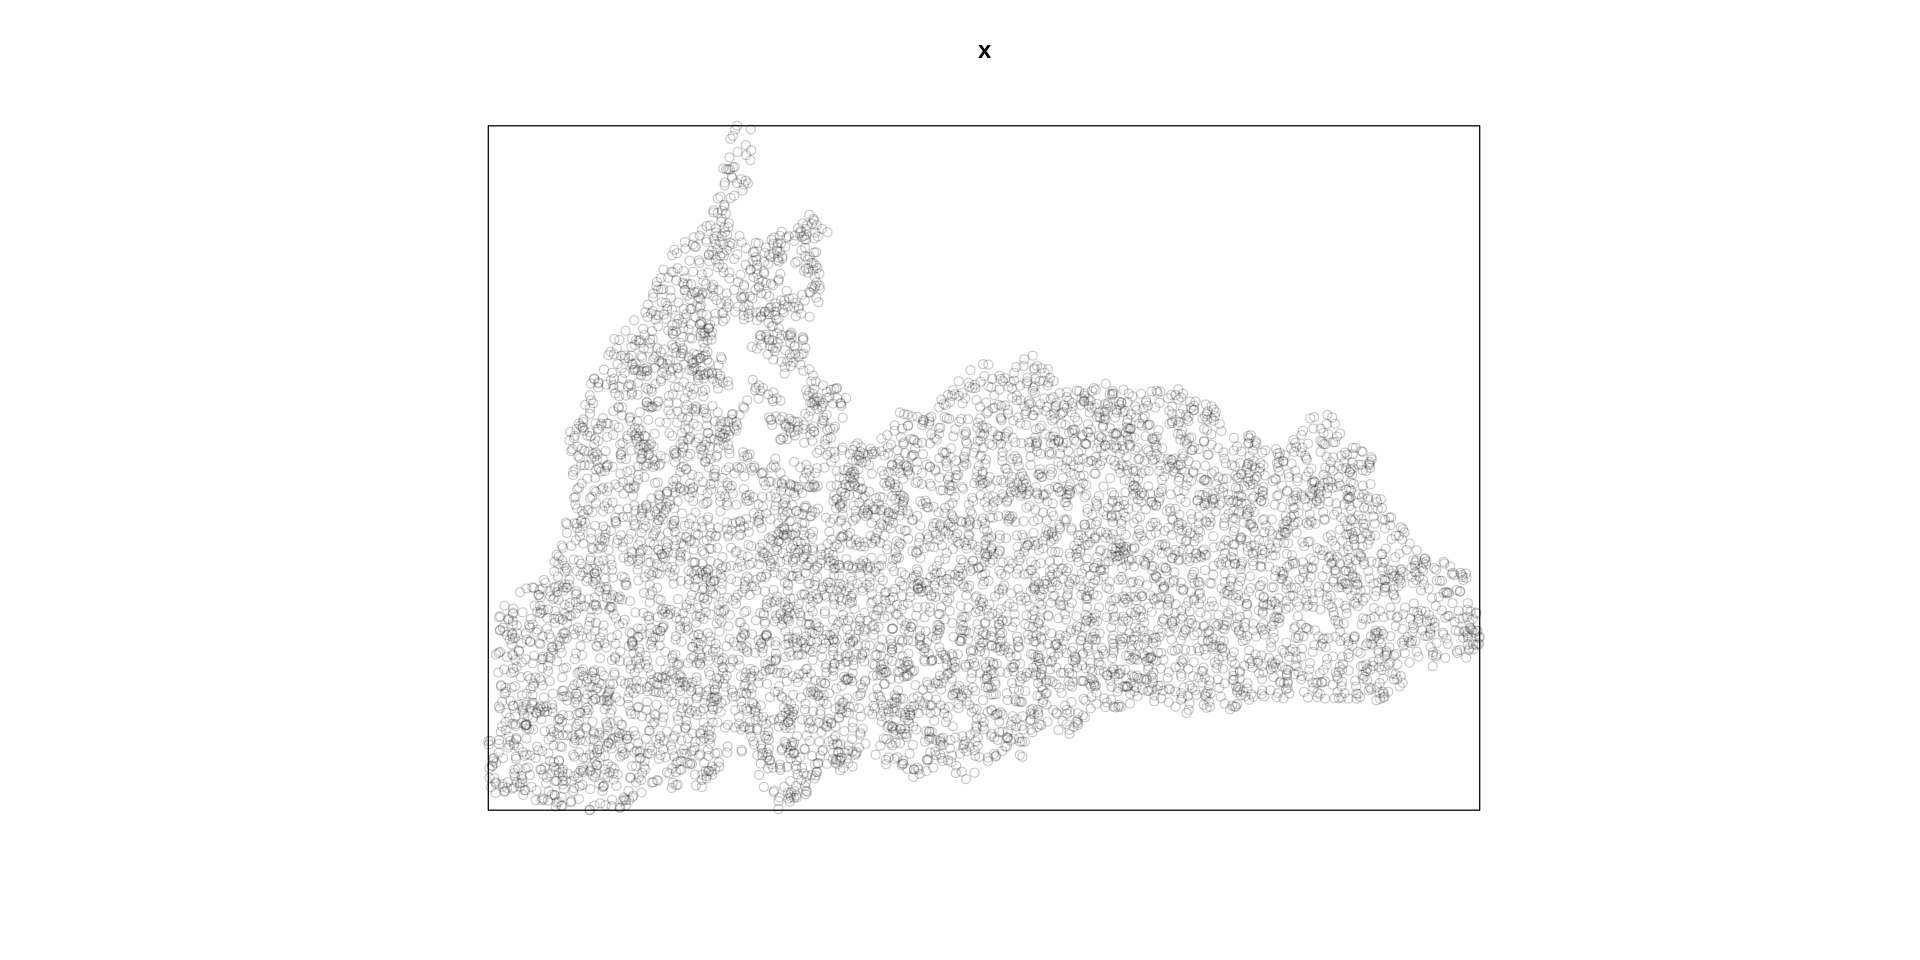

In [9]:
x <- ppp(cx, cy, range(cx), range(cy))
unitname(x) <- c("meter", "meters") # asignar sistema de medidas metros a x e y
plot(x) # plotear object PPP
summary(x)

Anteriormente no se consideró información complementaria, sólo la ubicación espacial. Ahora agreguemos intensidad (mark), de acuerdo a un atributo en particular.

Marked planar point pattern:  6818 points
Average intensity 5.651786e-06 points per square meter

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 meters

marks are numeric, of type ‘double’
Summary:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001099 0.282108 0.448072 0.492544 0.712131 0.930196 

Window: rectangle = [208955.91, 250757.32] x [6125678, 6154537] meters
                    (41800 x 28860 meters)
Window area = 1206340000 square meters
Unit of length: 1 meter

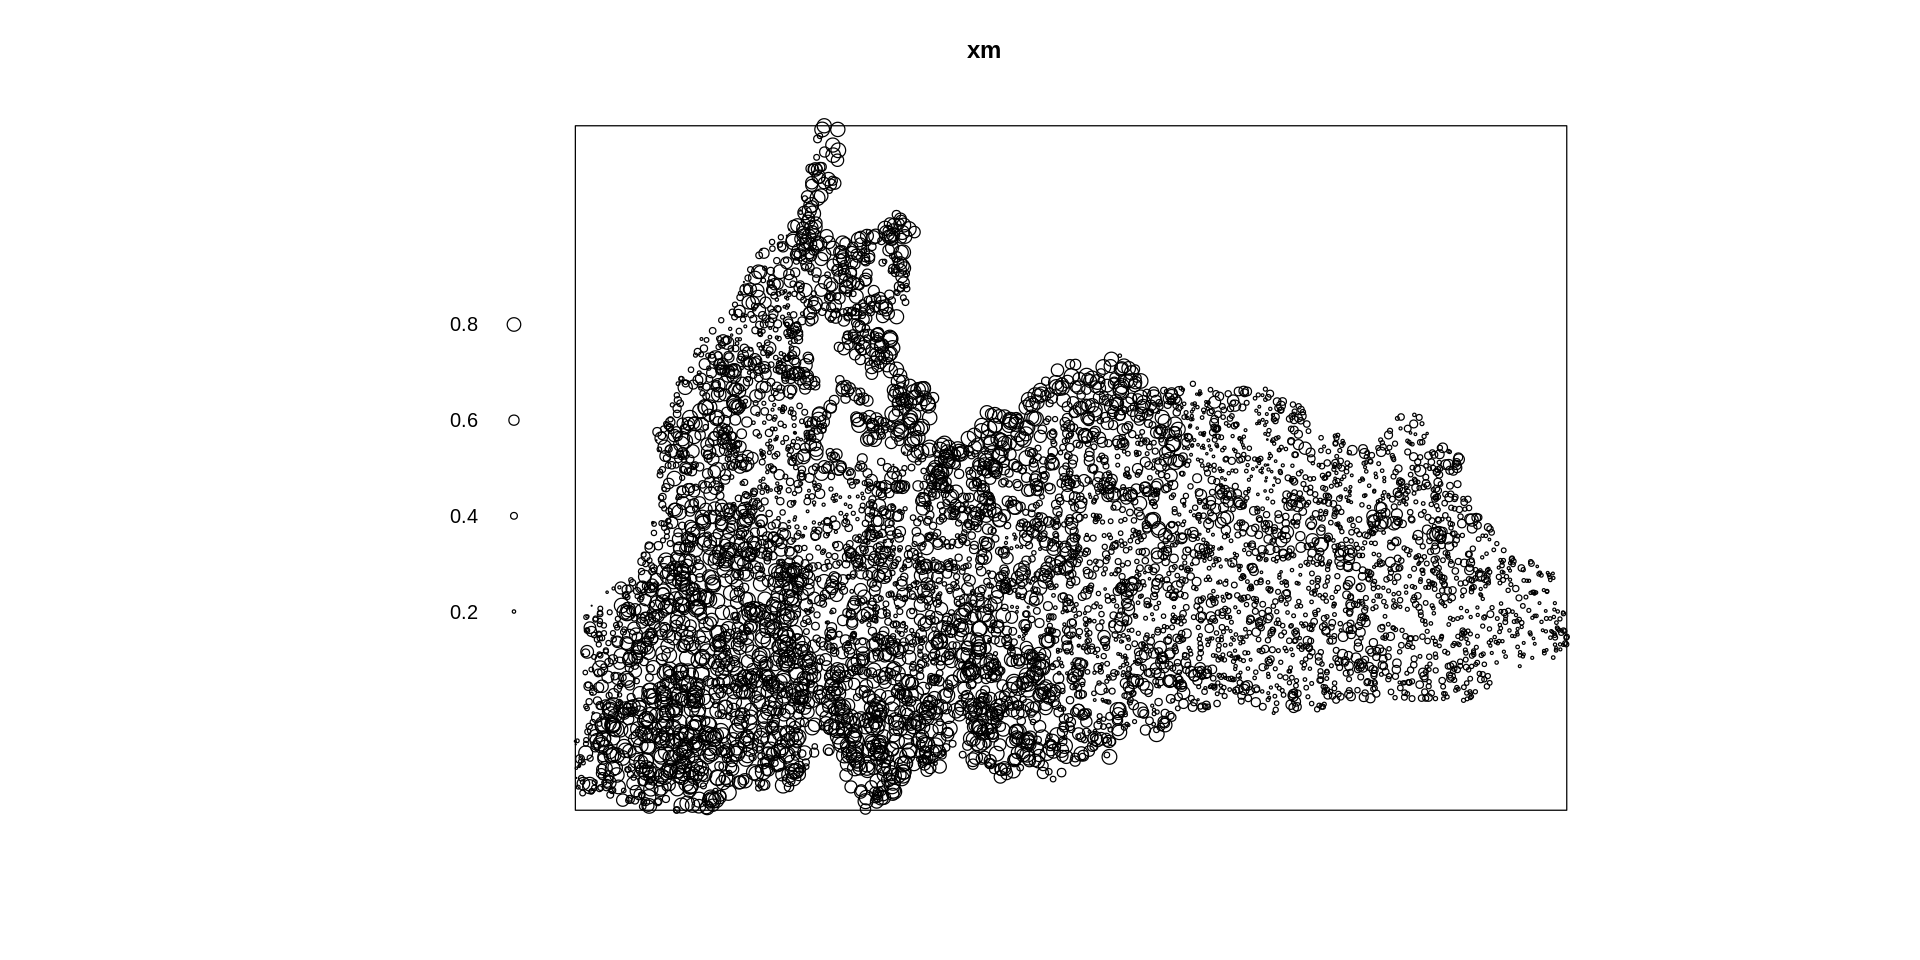

In [10]:
xm <- ppp(cx, cy, range(cx), range(cy), marks = s$ndvi)
unitname(xm) <- c("meter", "meters") # asignar tipo de medida
plot(xm) # plotear objecto PPP
summary(xm) # Resumir el objeto Xm de patrones de puntos

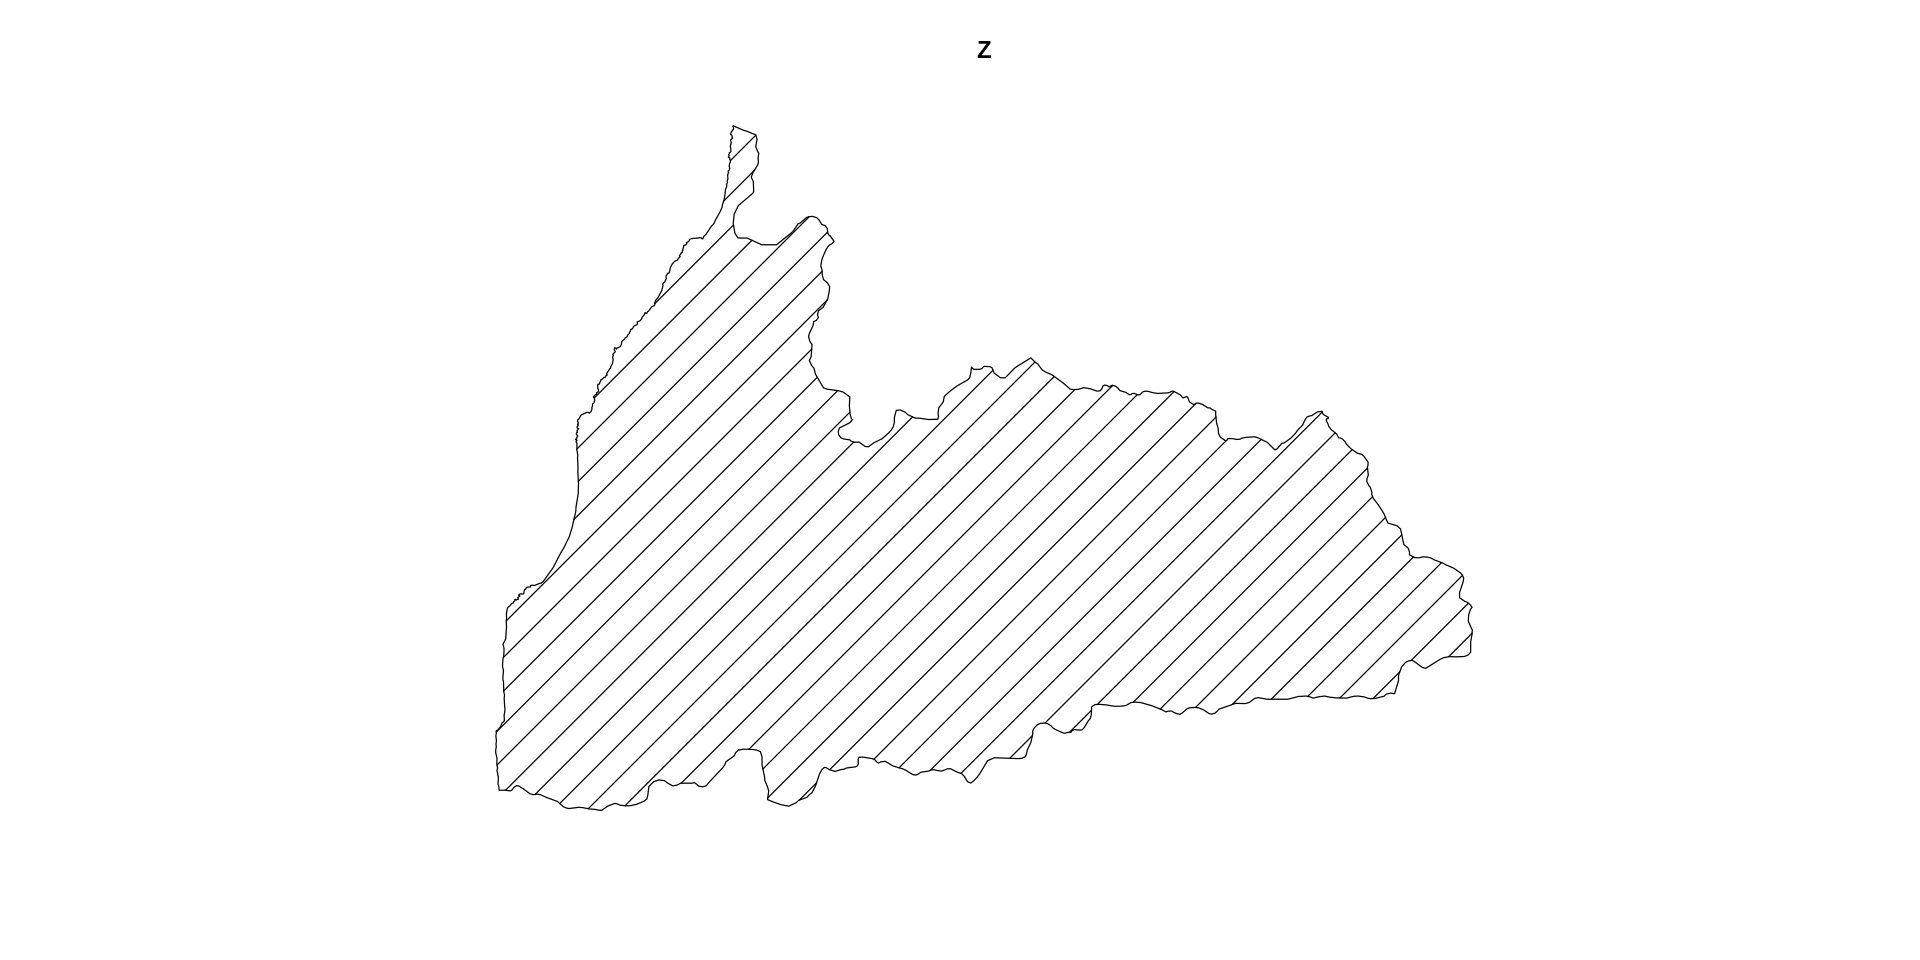

In [11]:
cuenca_cords <- st_coordinates(cuenca_s) |> as.data.frame()
Z <- owin(poly = list(x = rev(cuenca_cords$X), y=rev(cuenca_cords$Y))) # objeto almacenado en Z
plot(Z, hatch = T) # plotear la ventana Z

Warning message:
“1 point was rejected as lying outside the specified window”
Warning message in plot.ppp(xw, main = "Taller 2"):
“1 illegal points also plotted”


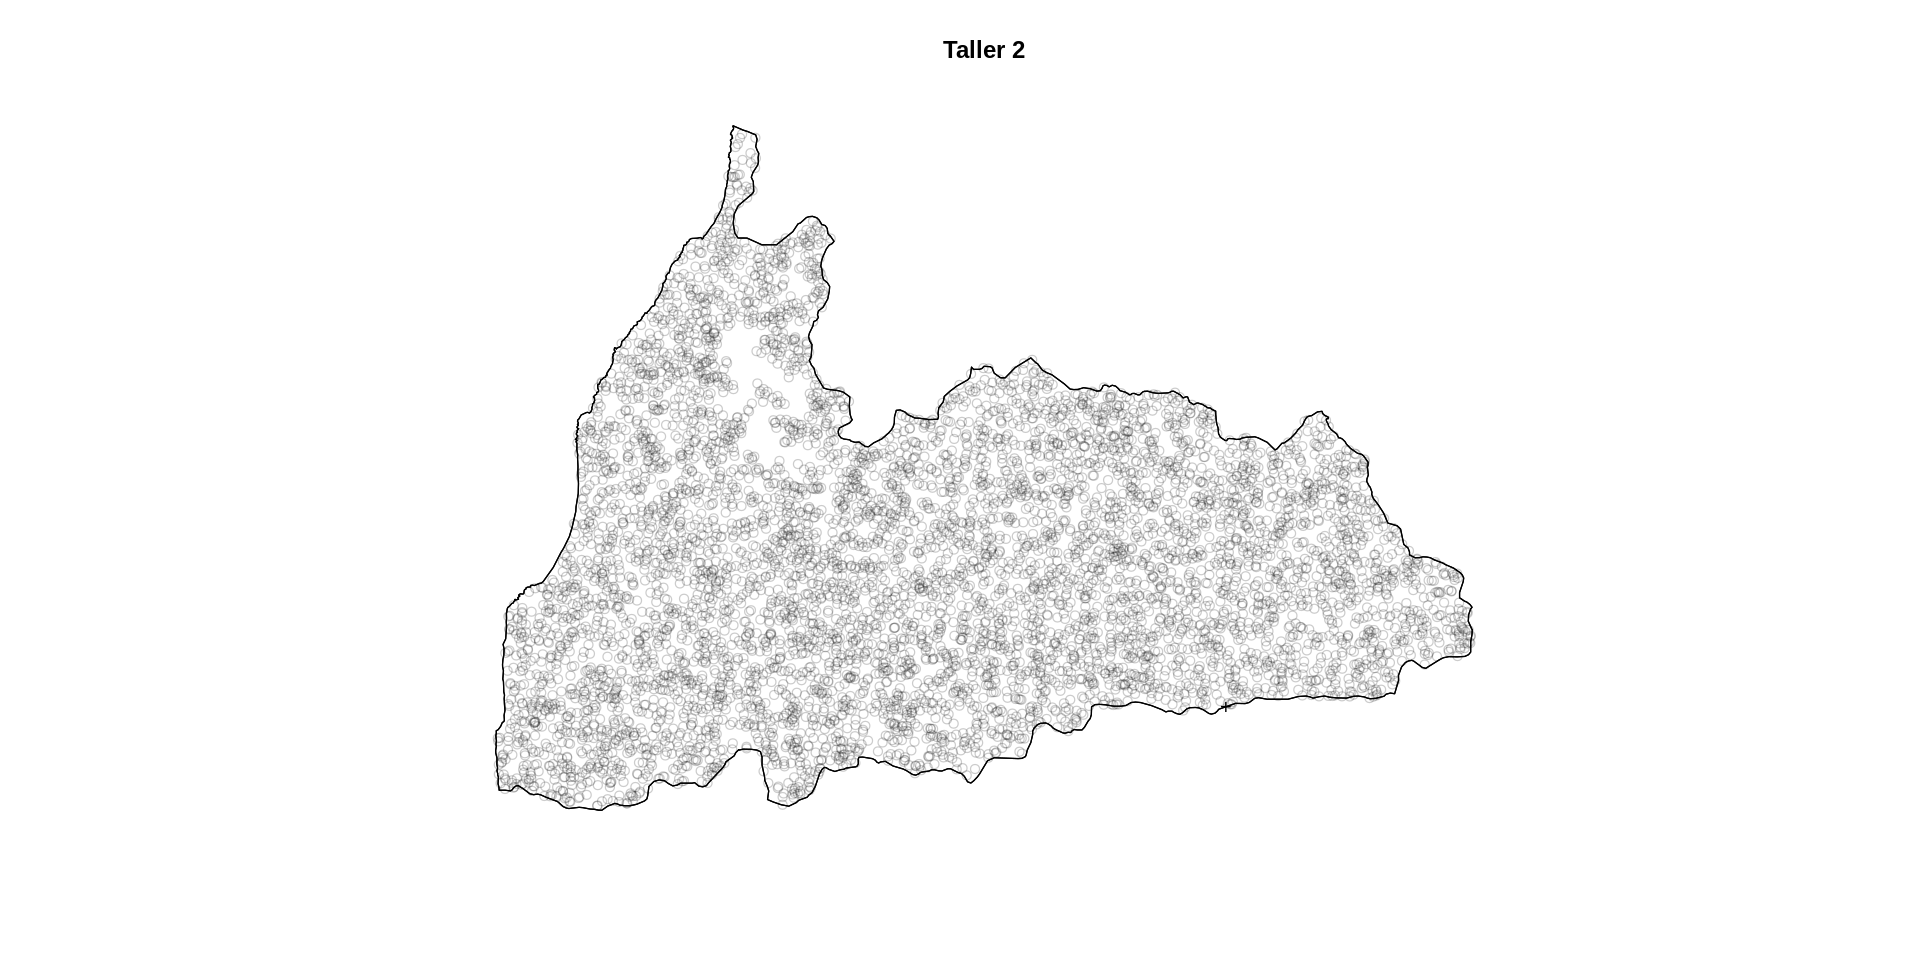

In [12]:
# Crear objeto ppp de patr?n de punto incluyendo ventana Z
xw <- ppp(cx,cy, window = Z) # Xw nombre del objeto creado
plot(xw, main = "Taller 2") # plotear objeto Xw

Warning message:
“1 point was rejected as lying outside the specified window”
Warning message in plot.ppp(xmw):
“1 illegal points also plotted”


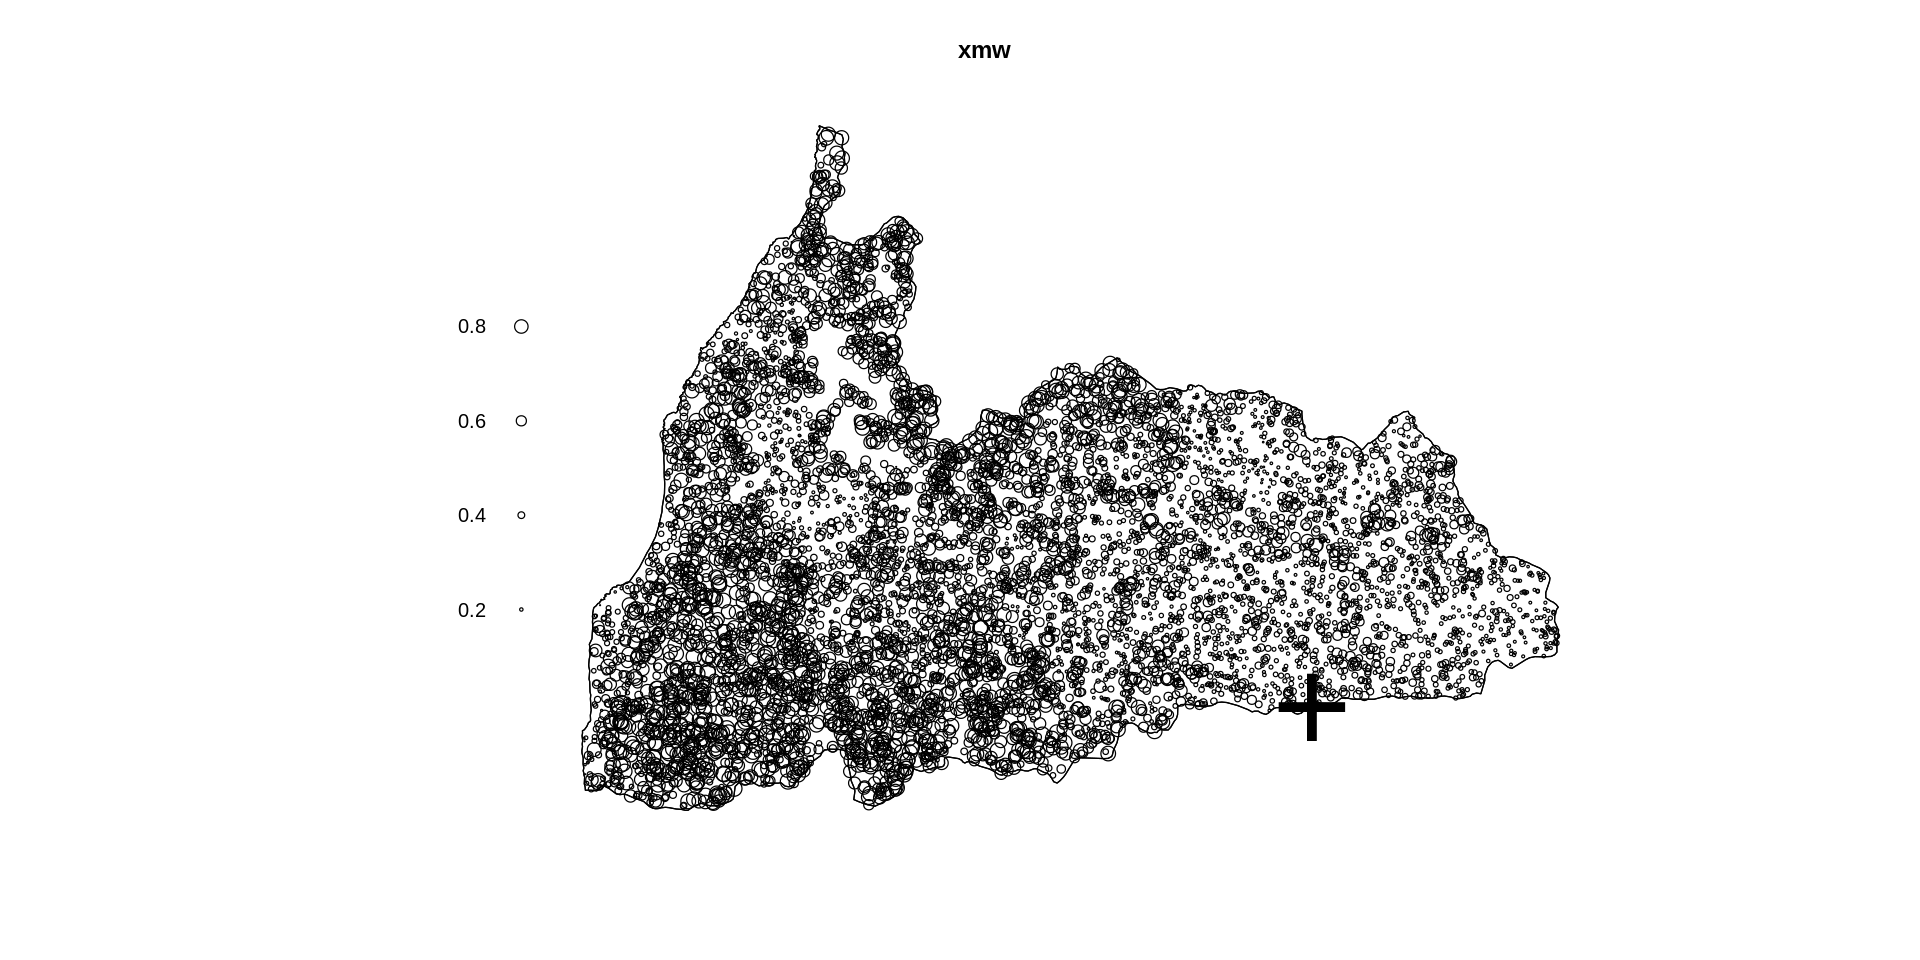

In [13]:
# Crear objeto ppp de patron de puntos con Marca y ventana Z
xmw <- ppp(cx,cy, window = Z, marks = s$ndvi)
plot(xmw)

1. `x` = sólo localización de puntos
1. `xm` = localización de puntos y NDVI como marca
1. `xw` = localizanción de puntos con ventana
1. `xmw` = Localización+marca+ventana polígono

## Patrones

In [14]:
Q <- quadratcount(xw, nx=10, ny=10) # nx y ny número de cuadrados

Warning message in plot.ppp(xw):
“1 illegal points also plotted”


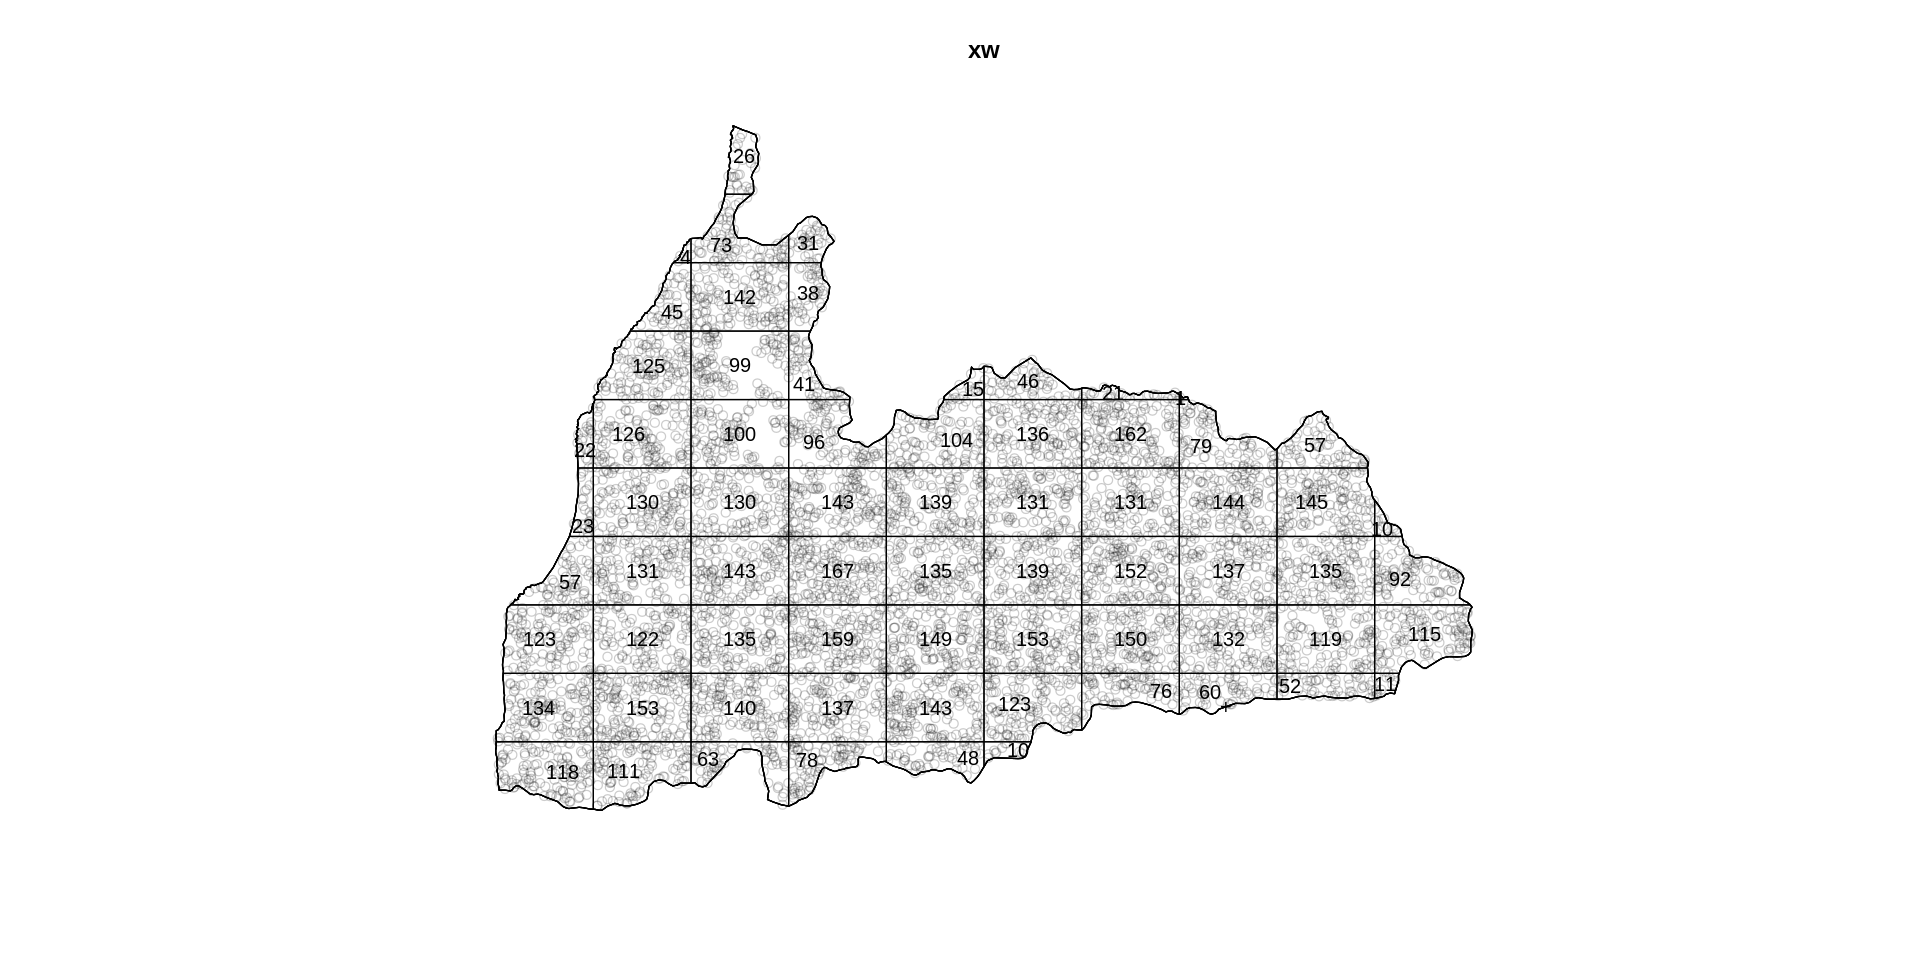

In [15]:
plot(xw) # se puede plotear
plot(Q, add = TRUE, cex=1)

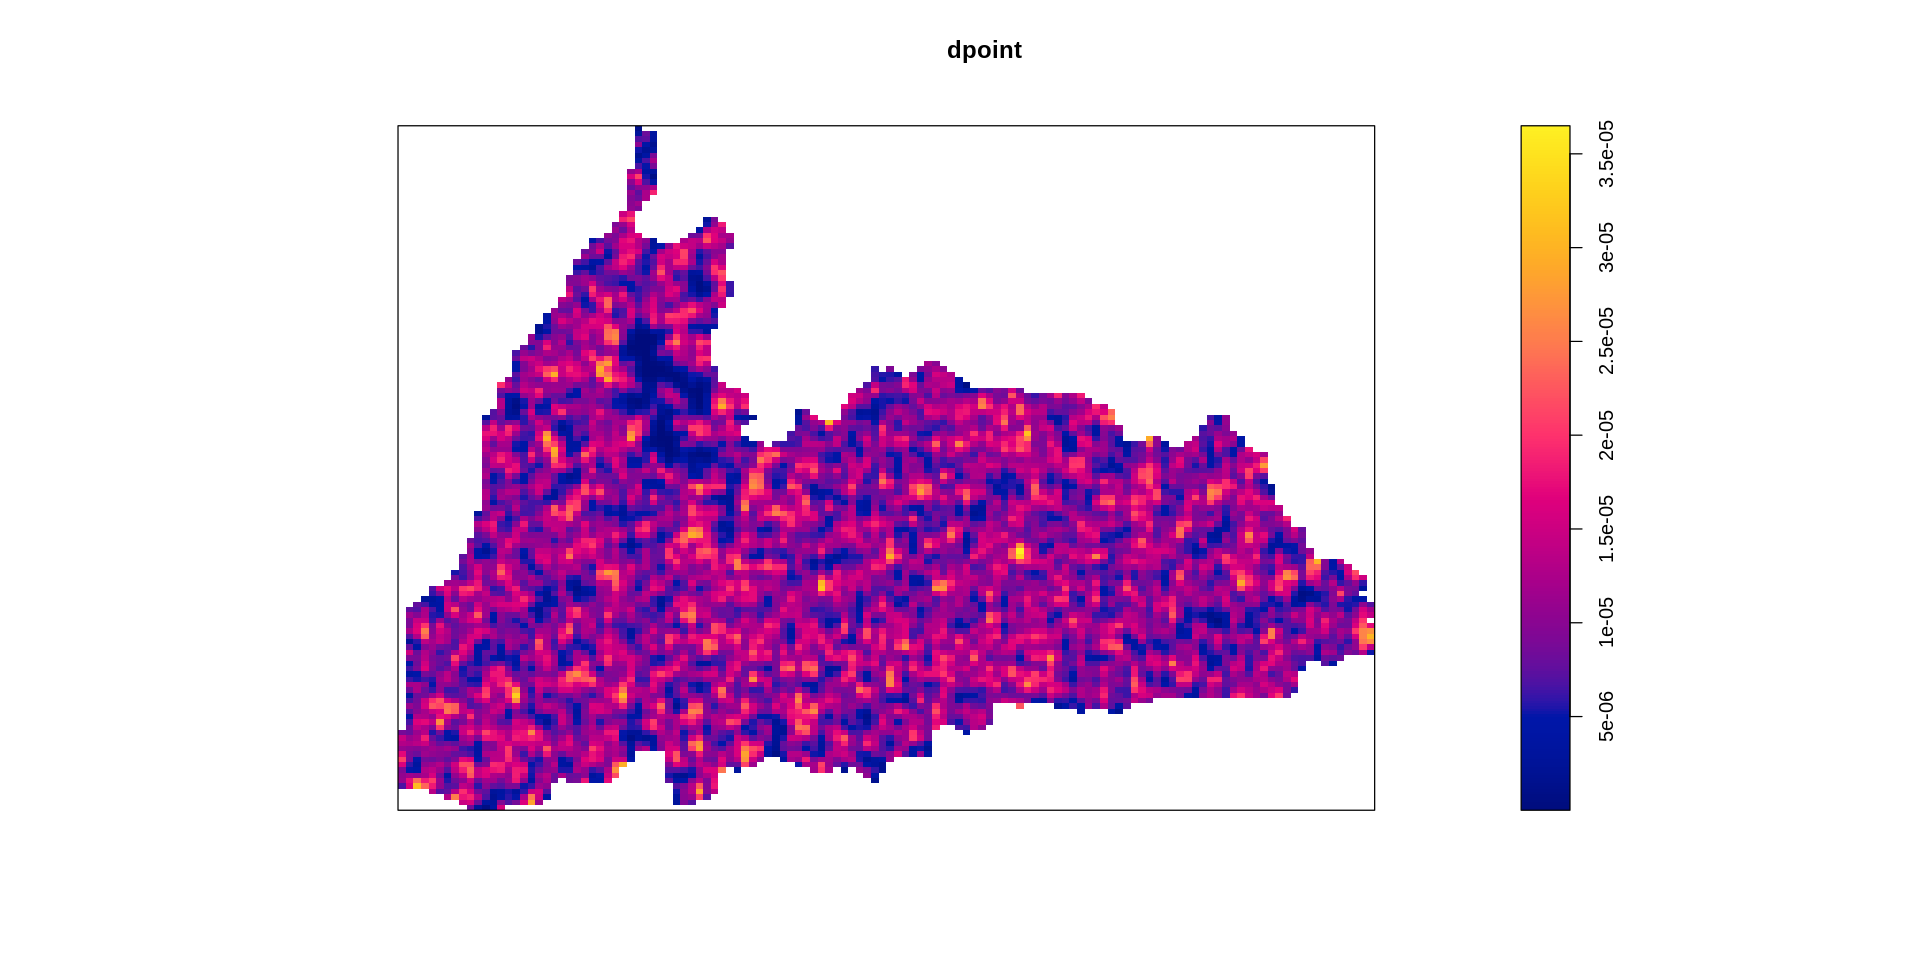

In [16]:
dpoint <- density(xw, 200) # densidad de puntos de acuerdo a ventana kernel
plot(dpoint) #impresion of local spatial variatio

In [17]:
summary(dpoint)

real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [208863.8, 250822.1] x [6125493, 6154898] units
dimensions of each pixel: 328 x 229.7266 units
Image is defined on a subset of the rectangular grid
Subset area = 613728224.028946 square units
Subset area fraction = 0.497
Pixel values (inside window):
	range = [5.644569e-09, 3.64952e-05]
	integral = 6794.058
	mean = 1.107014e-05

Warning message:
“1 point was rejected as lying outside the specified window”
Warning message in plot.ppp(xw, main = "Taller 2", add = T):
“1 illegal points also plotted”


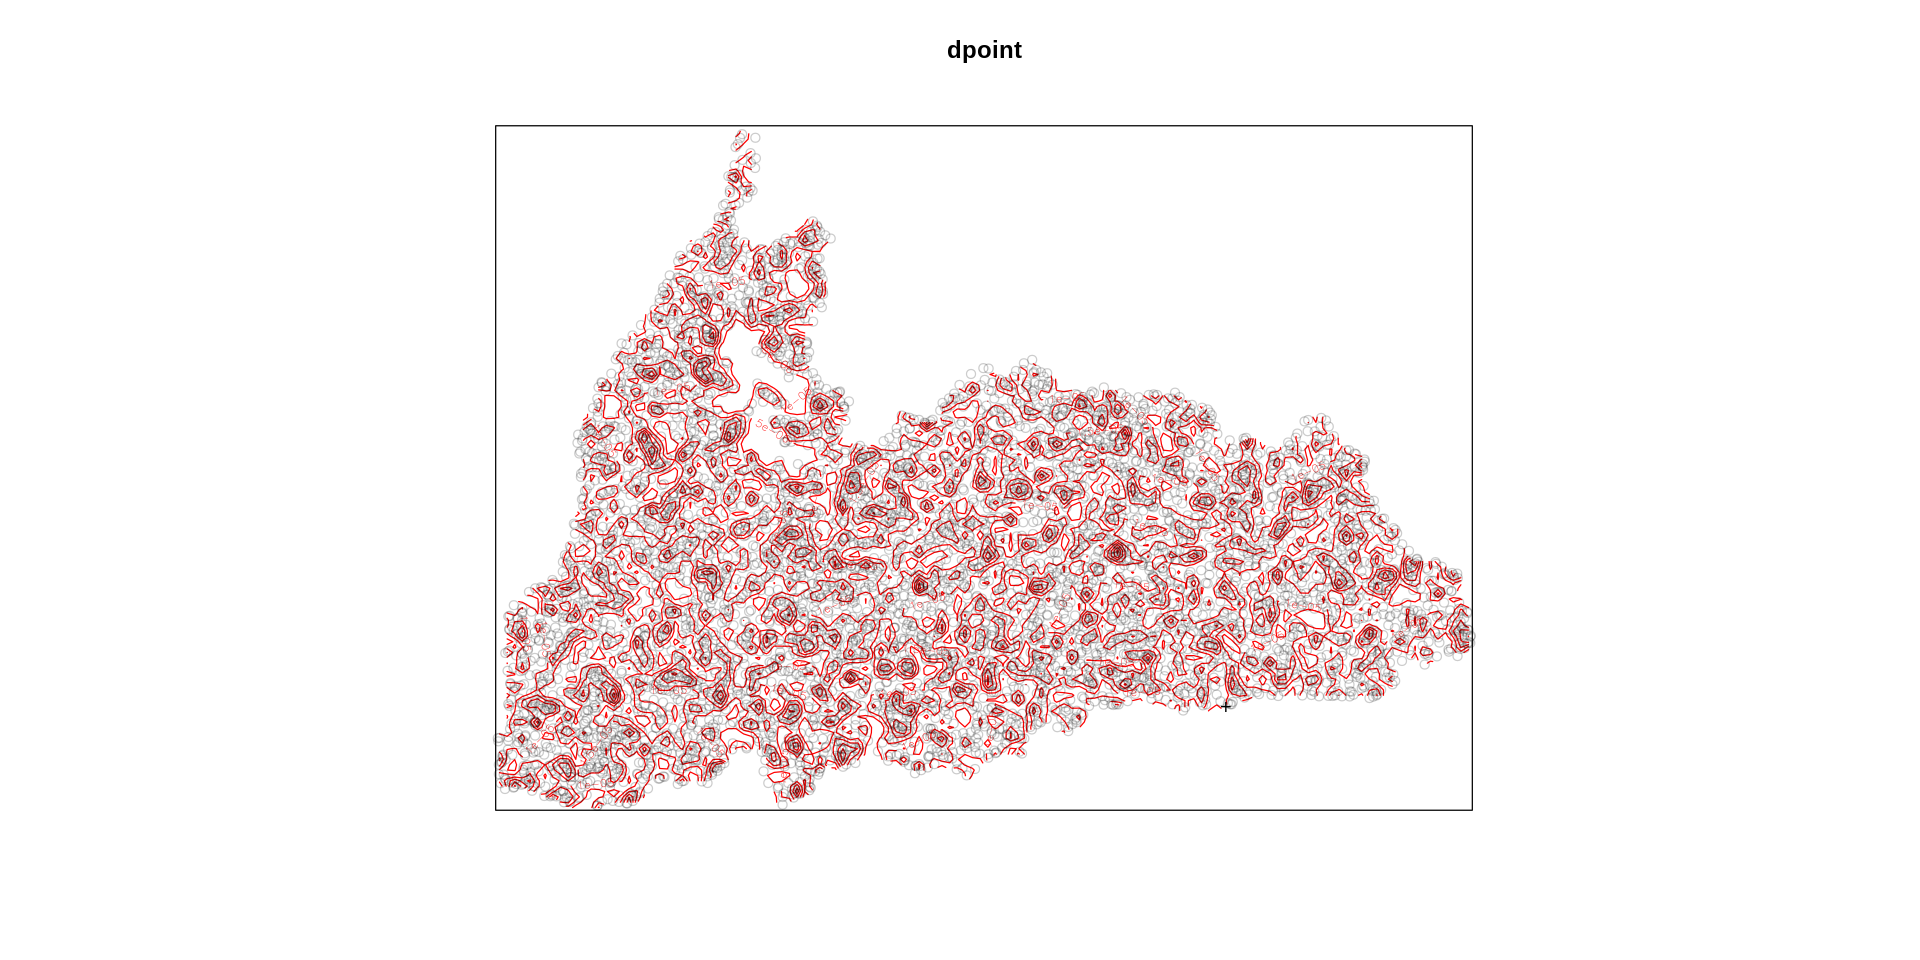

In [18]:
contour(dpoint, col="red") # densidad con lineas de contorno
xw <- ppp(cx,cy, window = Z) # Xw nombre del objeto creado
plot(xw, main = "Taller 2", add=T) # plotear objeto Xw

Warning message in plot.ppp(xw, add = TRUE):
“1 illegal points also plotted”


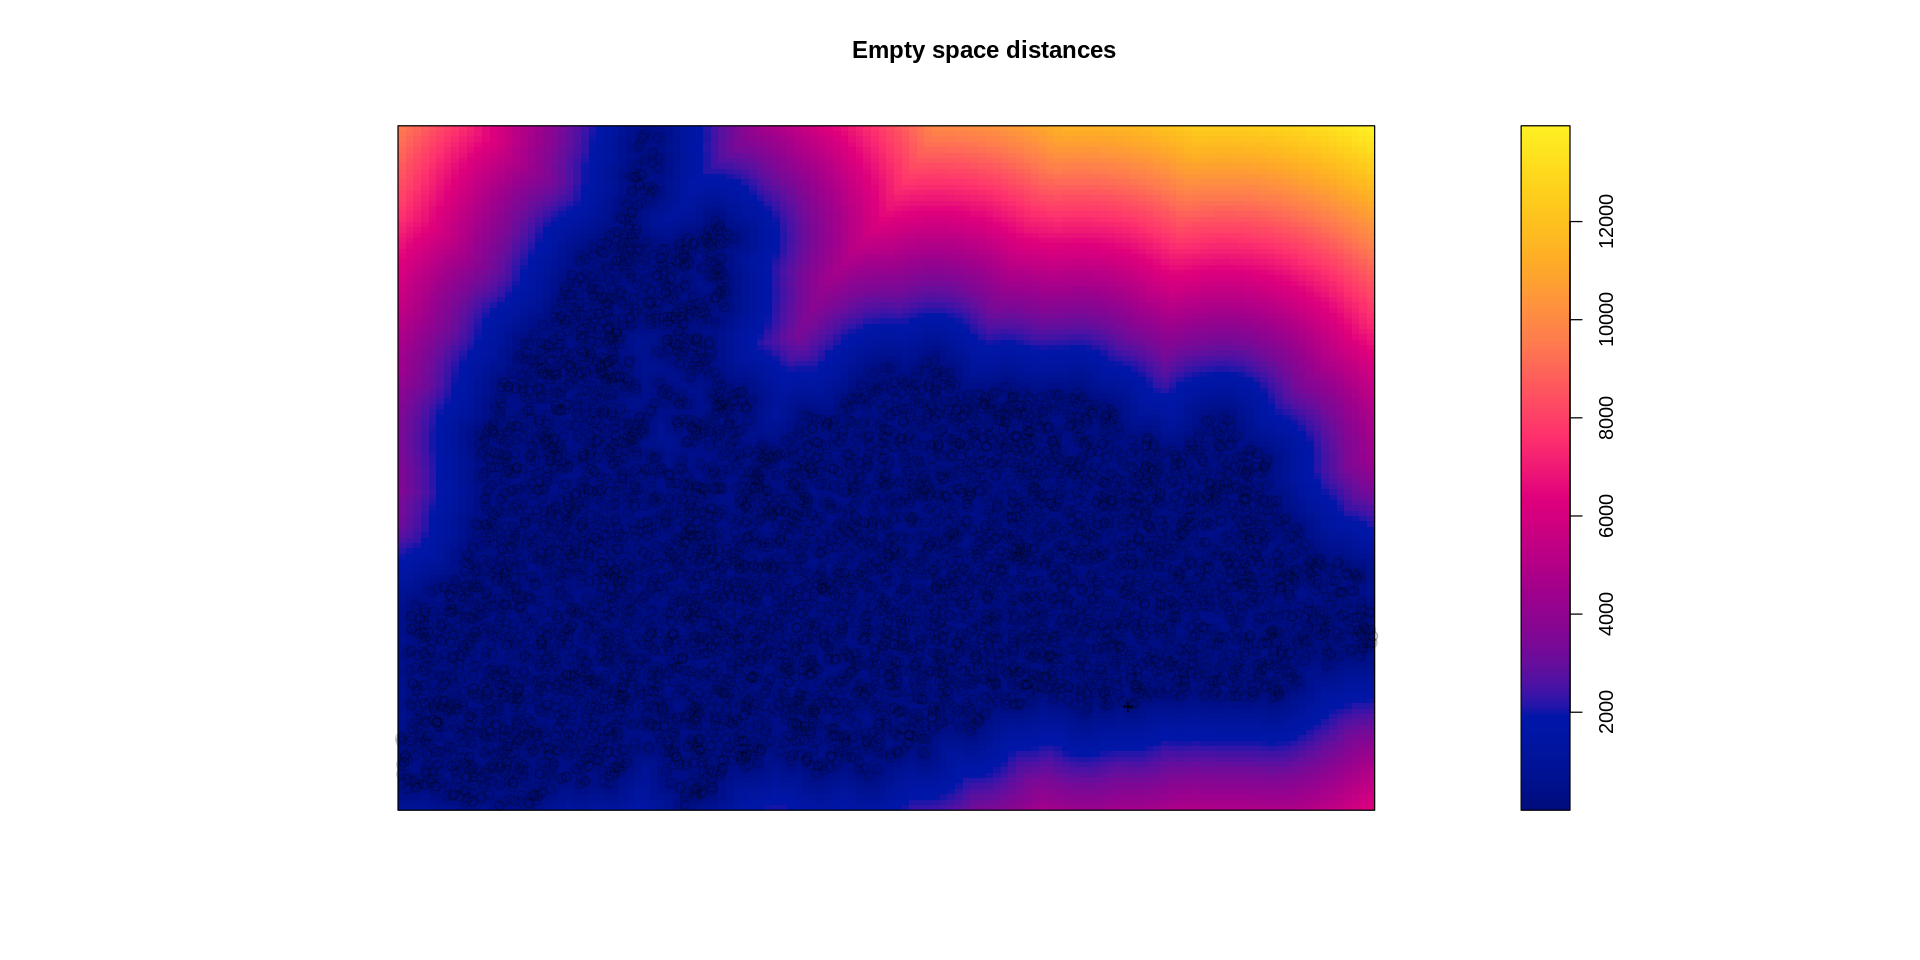

In [19]:
emp <- distmap(xw)
plot(emp, main = "Empty space distances")
plot(xw, add = TRUE)

### Test aleatoriedad espacial (Poisson process)

Revisemos si es completamente aleatorio (CRS)

* $H_0$: CSR con Poisson (proceso homogéneo Poisson)
* $H_1$: No CSR

In [20]:
M <- quadrat.test(xw, nx = 4, ny = 4)
M


	Chi-squared test of CSR using quadrat counts

data:  xw
X2 = 26.149, df = 13, p-value = 0.03247
alternative hypothesis: two.sided

Quadrats: 14 tiles (irregular windows)

Warning message in plot.ppp(xw):
“1 illegal points also plotted”


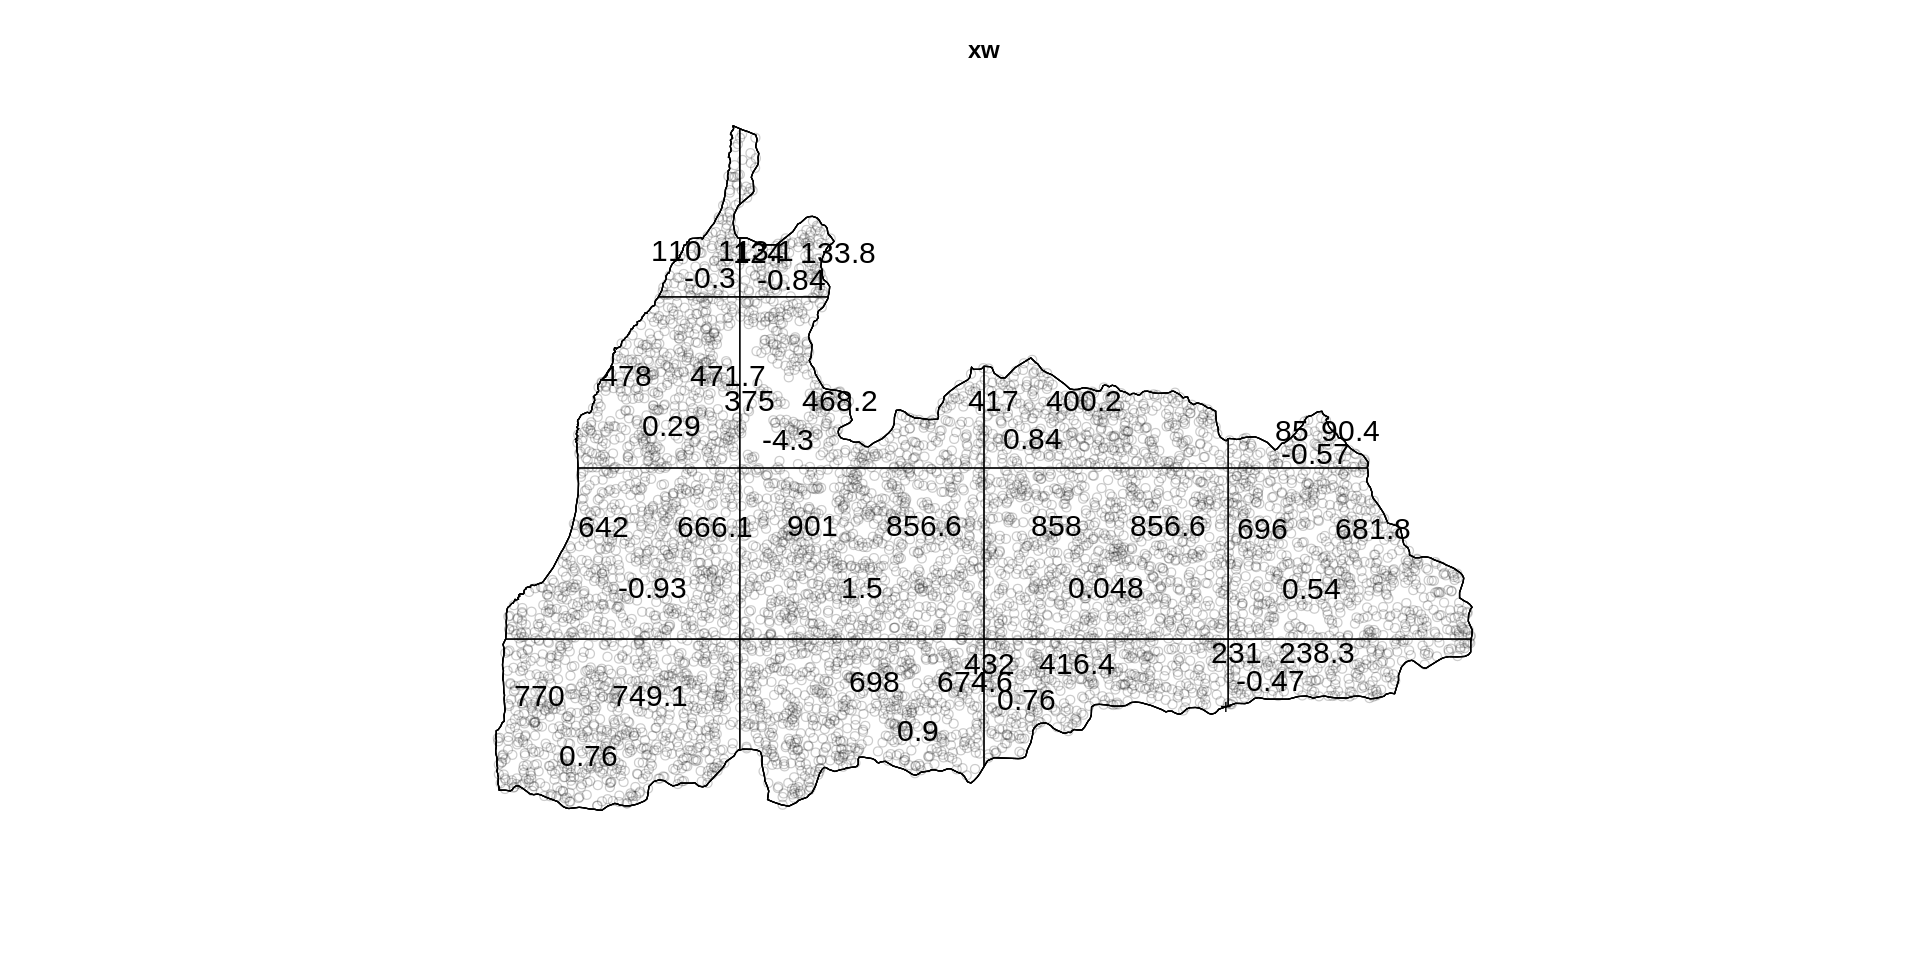

In [21]:
plot(xw)
plot(M, add = TRUE, cex = 1.5)

Pearson residuals: $\frac{obs - esp}{\sqrt{esp}}$

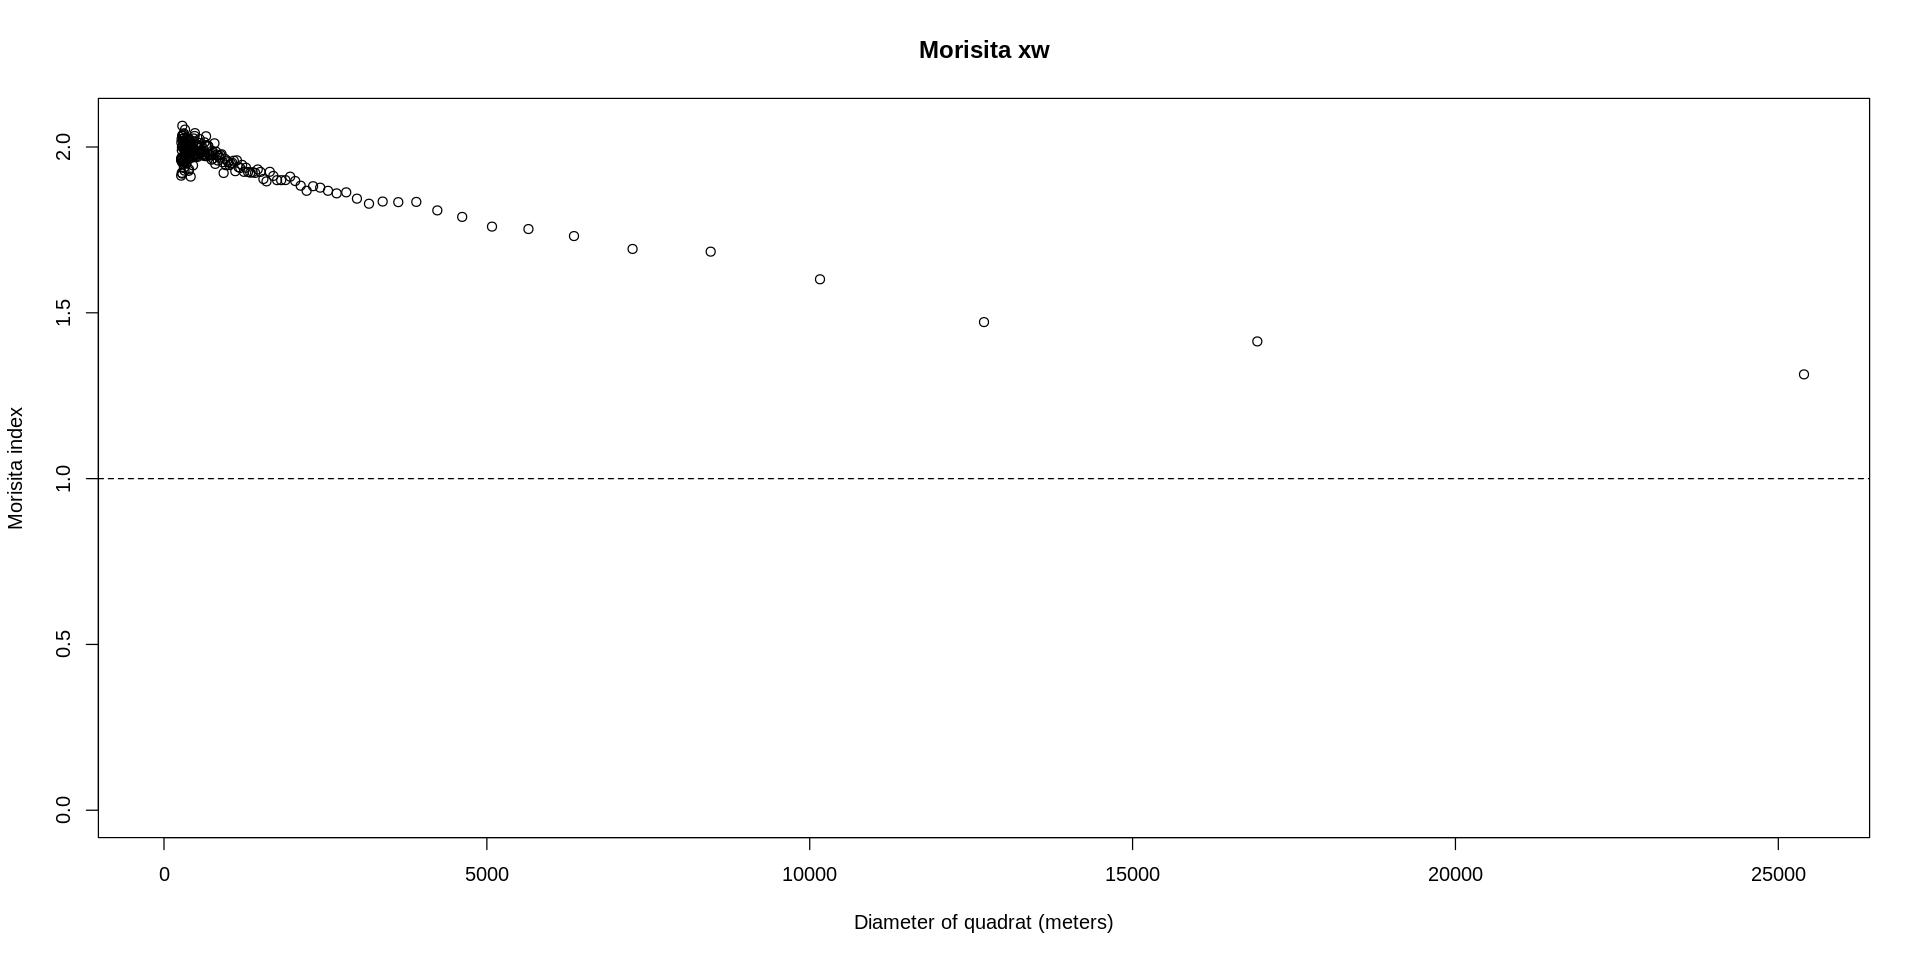

In [22]:
miplot(x, main="Morisita xw") # Morisita’s index of dispersion